In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel('file:///Users/mengyuanchen/Desktop/19FALL/IE%20598/HW/HW4/housing.xlsx')
df=df.dropna()
summary = df.describe()
print (summary)
# the code is orignal from Rashka's book and Datacamp
# I get helped from Jiaqi Su for the lasso regression and ridge regression, because my code did not run successfully.

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [102]:
#Split data
X=df.values[:,:13]
y=df.values[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

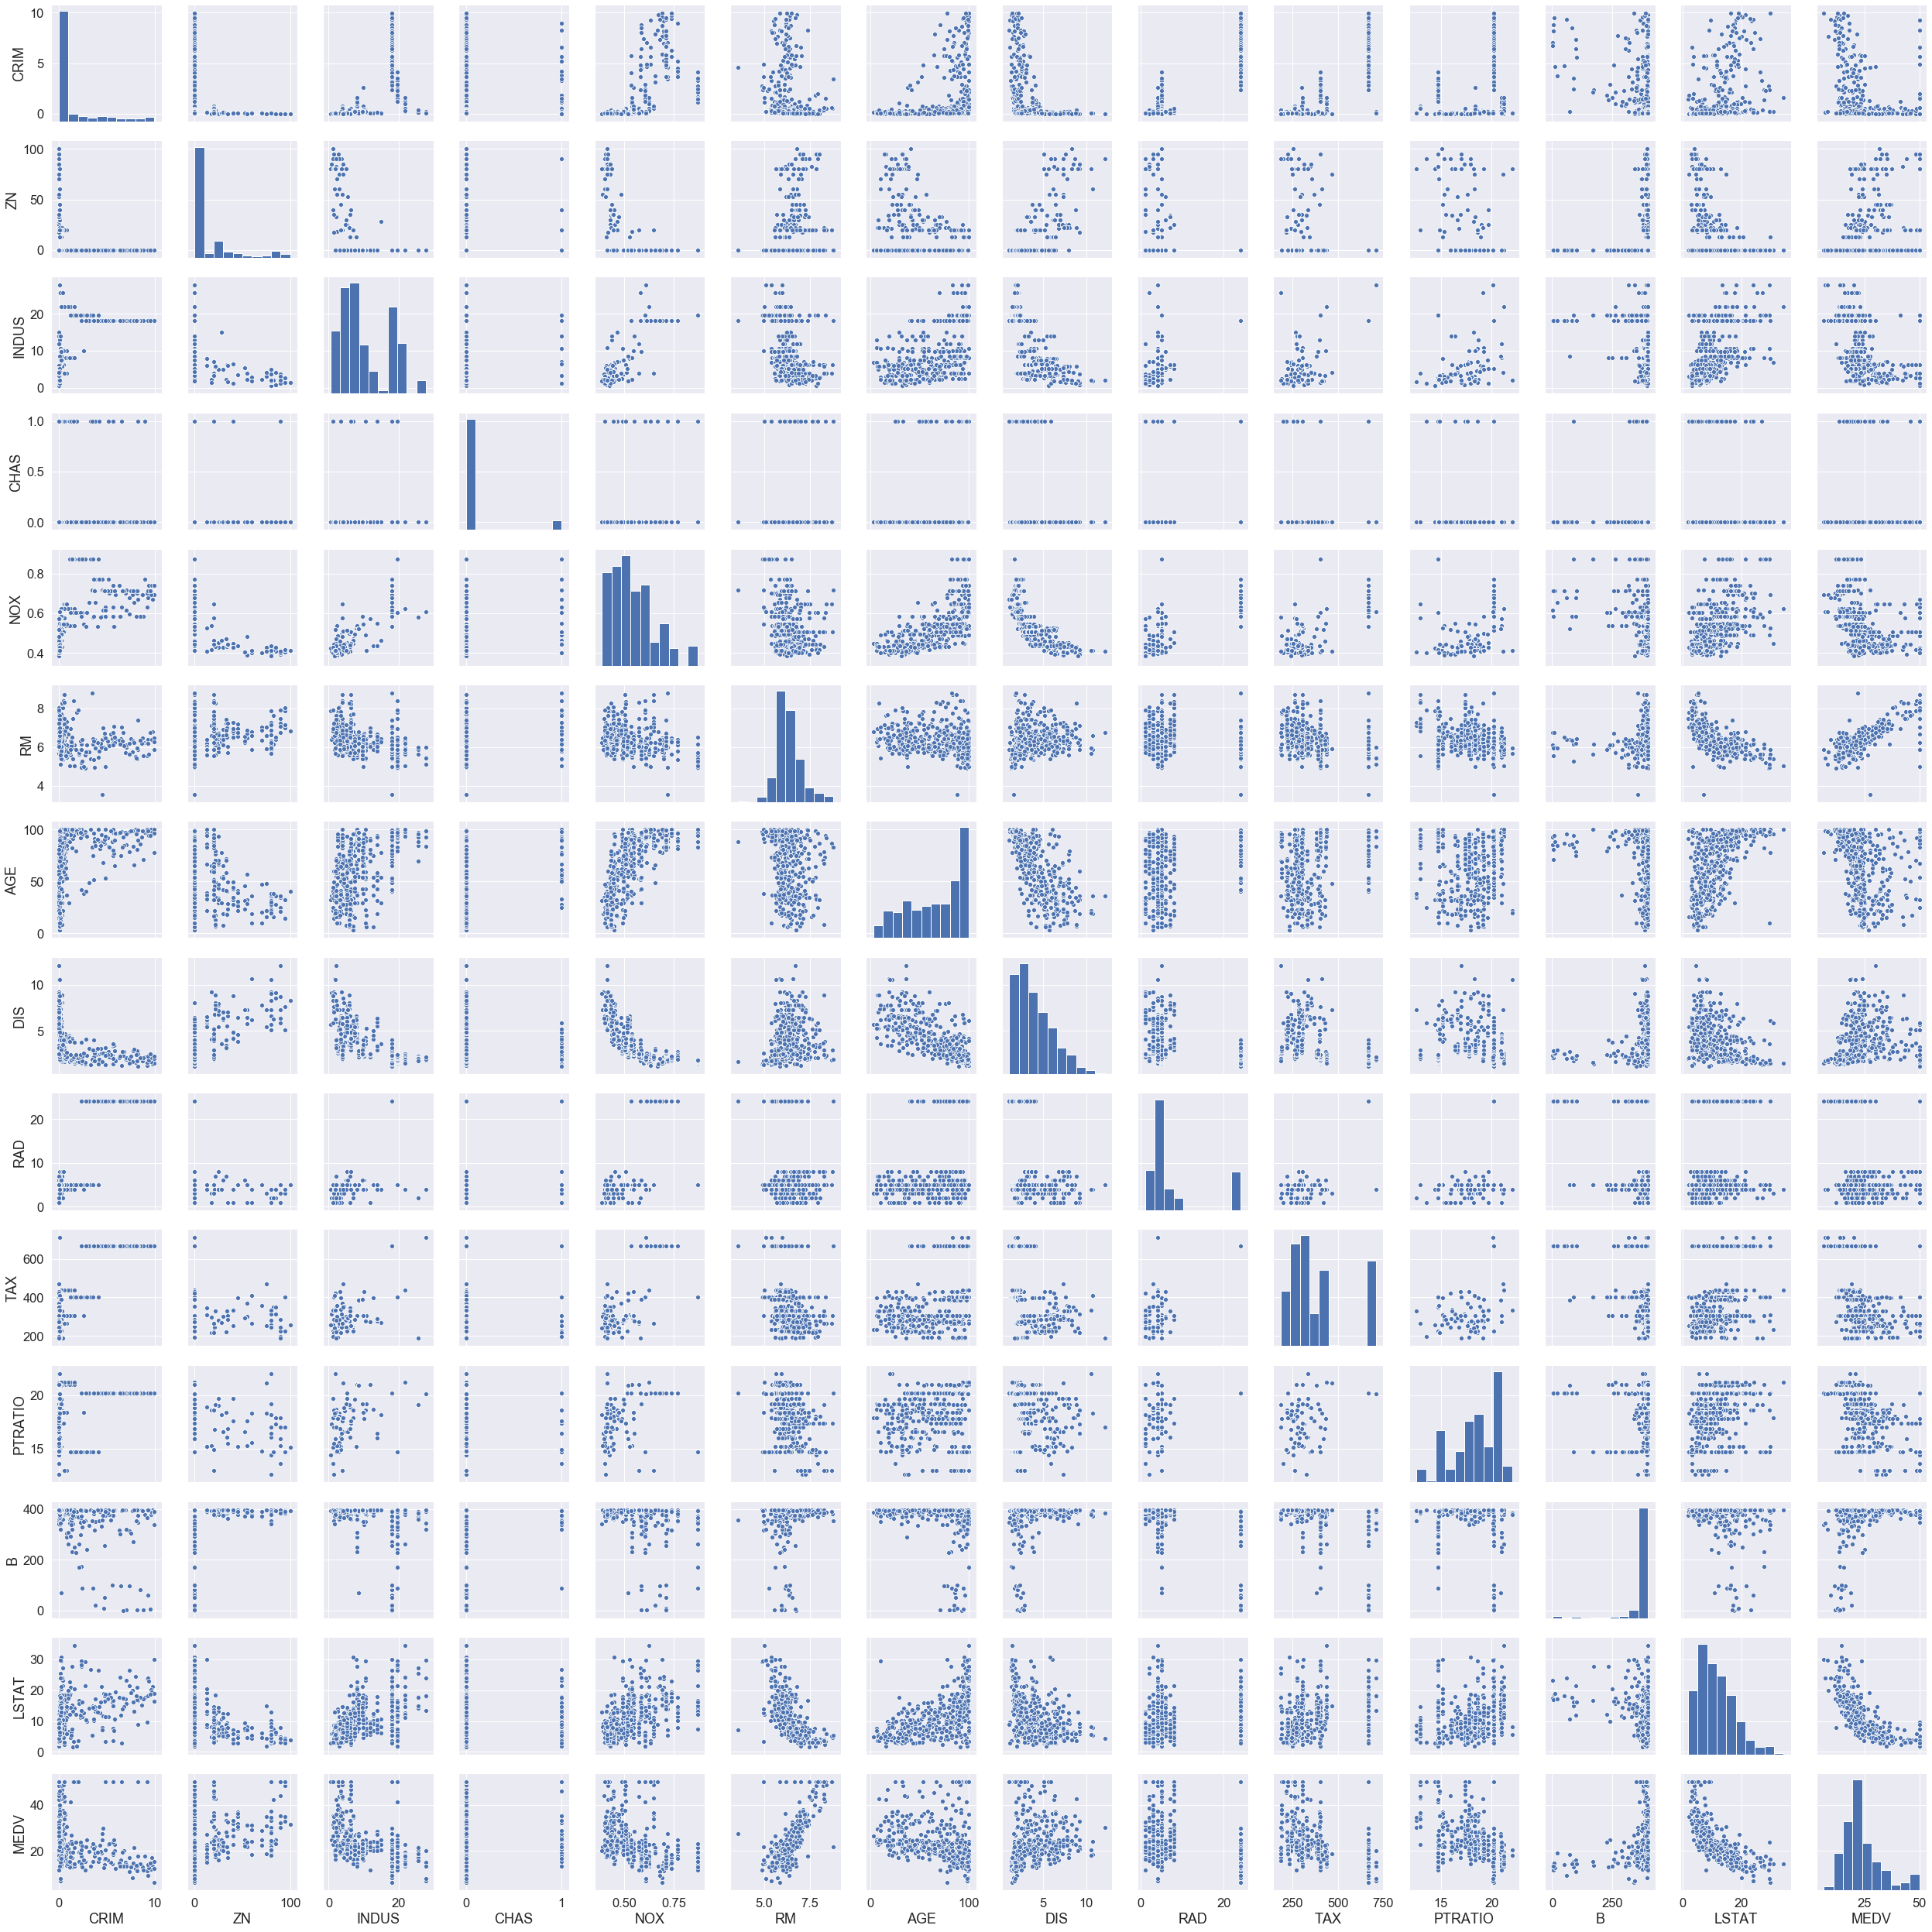

In [78]:
# Exploratory Data Analysis
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

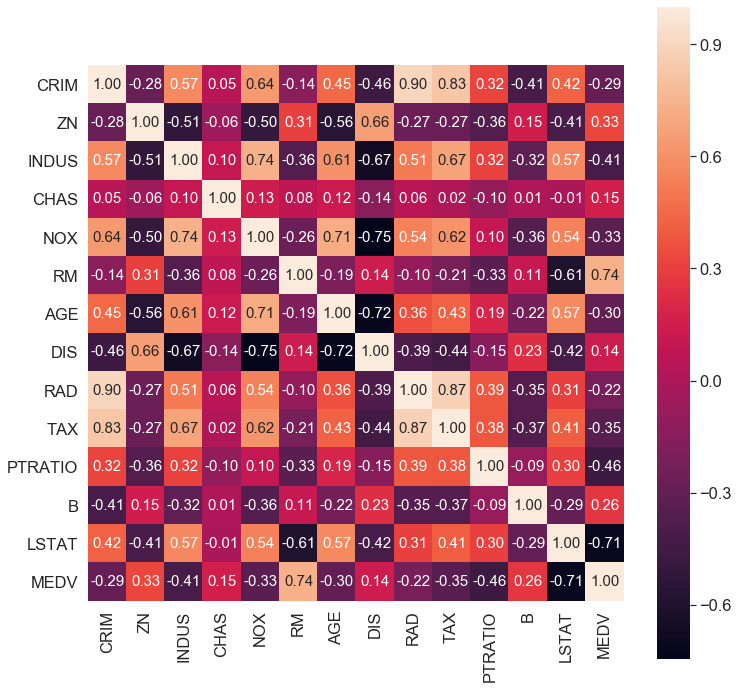

In [79]:
# Correlation coefficients heatmap
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.gcf().set_size_inches(12, 12)
plt.show()

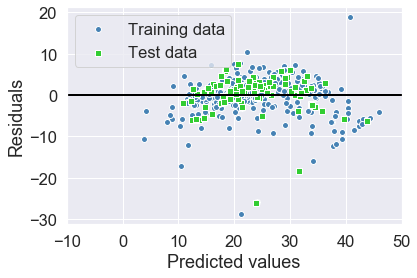

Slope: -0.211
Intercept: 20.400
R^2 train: 0.747, test: 0.698
MSE train: 20.042, test: 20.975


In [103]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
# R^2
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))
#MSE
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

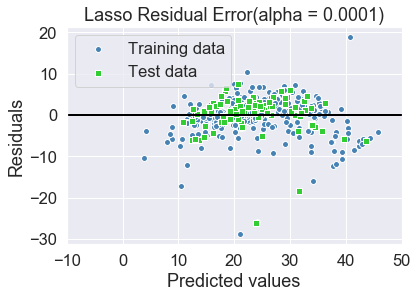

Slope:[-2.03291855e-01  2.99837246e-02  4.98822218e-02  1.78640439e+00
 -1.15519252e+01  5.31830979e+00 -2.05516981e-02 -1.33507549e+00
  2.44163037e-01 -9.16132875e-03 -8.76758271e-01  1.36651151e-02
 -4.79644503e-01]
y Intercept:20.304217528549113
Lasso coefficients:[-2.03291855e-01  2.99837246e-02  4.98822218e-02  1.78640439e+00
 -1.15519252e+01  5.31830979e+00 -2.05516981e-02 -1.33507549e+00
  2.44163037e-01 -9.16132875e-03 -8.76758271e-01  1.36651151e-02
 -4.79644503e-01]
MSE train: 20.043, test: 20.983
R^2 train: 0.747, test: 0.698


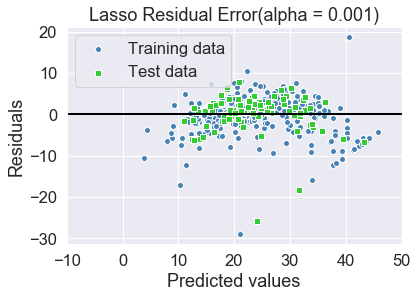

Slope:[-1.30058145e-01  2.67368711e-02  2.90870826e-02  1.78680689e+00
 -1.08701276e+01  5.32241582e+00 -1.94441523e-02 -1.29174350e+00
  2.00756966e-01 -7.79178671e-03 -8.61868818e-01  1.36273179e-02
 -4.82757728e-01]
y Intercept:19.411387602239646
Lasso coefficients:[-1.30058145e-01  2.67368711e-02  2.90870826e-02  1.78680689e+00
 -1.08701276e+01  5.32241582e+00 -1.94441523e-02 -1.29174350e+00
  2.00756966e-01 -7.79178671e-03 -8.61868818e-01  1.36273179e-02
 -4.82757728e-01]
MSE train: 20.066, test: 21.083
R^2 train: 0.747, test: 0.696


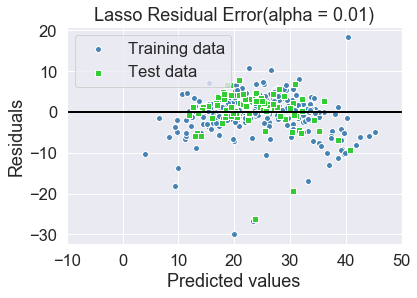

Slope:[-0.00000000e+00  3.43062943e-03 -0.00000000e+00  1.46298291e+00
 -5.73745591e+00  5.49717086e+00 -7.34414167e-03 -7.59825430e-01
  0.00000000e+00 -4.99601358e-05 -7.88530875e-01  1.18206510e-02
 -5.01206120e-01]
y Intercept:11.19434542679139
Lasso coefficients:[-0.00000000e+00  3.43062943e-03 -0.00000000e+00  1.46298291e+00
 -5.73745591e+00  5.49717086e+00 -7.34414167e-03 -7.59825430e-01
  0.00000000e+00 -4.99601358e-05 -7.88530875e-01  1.18206510e-02
 -5.01206120e-01]
MSE train: 21.080, test: 22.529
R^2 train: 0.734, test: 0.675


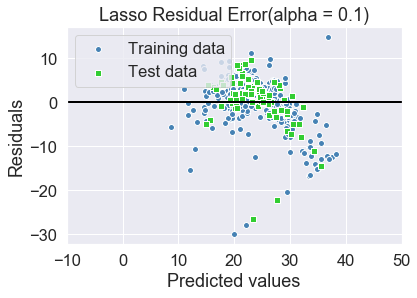

Slope:[-0.          0.         -0.          0.         -0.          4.59795918
 -0.         -0.         -0.         -0.         -0.25483183  0.
 -0.35920906]
y Intercept:3.462139287654871
Lasso coefficients:[-0.          0.         -0.          0.         -0.          4.59795918
 -0.         -0.         -0.         -0.         -0.25483183  0.
 -0.35920906]
MSE train: 30.211, test: 30.299
R^2 train: 0.619, test: 0.563


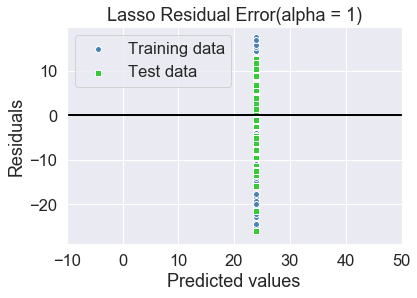

Slope:[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
y Intercept:23.91191135734072
Lasso coefficients:[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]
MSE train: 79.317, test: 70.023
R^2 train: 0.000, test: -0.009


In [109]:
#Lasso
alpha_space_lasso = [0.01, 0.02, 0.03, 0.04, 0.1]
X = df.iloc[:, :-1].values
y = df['MEDV'].values
for al_lasso in alpha_space_lasso:
    lasso = Lasso(alpha=al_lasso, normalize=True)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    plt.scatter(y_train_pred,  y_train_pred - y_train,
                c='steelblue', marker='o', edgecolor='white',
                label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='limegreen', marker='s', edgecolor='white',
                label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.title('Lasso Residual Error(alpha = ' + str(al_lasso) + ')')
    plt.show()

    print('Slope:' + str(lasso.coef_))
    print('y Intercept:' + str(lasso.intercept_))
    print('Lasso coefficients:' + str(lasso.coef_))

    #MSE(Lasso regression)
    print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

    #MSE(Lasso regression)
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))

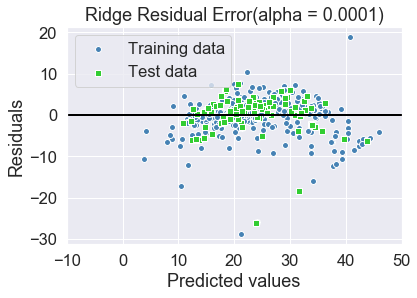

Slope:[-2.10564501e-01  3.03111985e-02  5.20482334e-02  1.78689938e+00
 -1.16193195e+01  5.31790480e+00 -2.06736976e-02 -1.33930258e+00
  2.48479204e-01 -9.29989586e-03 -8.78236442e-01  1.36710457e-02
 -4.79308587e-01]
y Intercept:20.391844864361516
Ridge coefficients:[-2.10564501e-01  3.03111985e-02  5.20482334e-02  1.78689938e+00
 -1.16193195e+01  5.31790480e+00 -2.06736976e-02 -1.33930258e+00
  2.48479204e-01 -9.29989586e-03 -8.78236442e-01  1.36710457e-02
 -4.79308587e-01]
MSE train: 20.042, test: 20.976
R^2 train: 0.747, test: 0.698


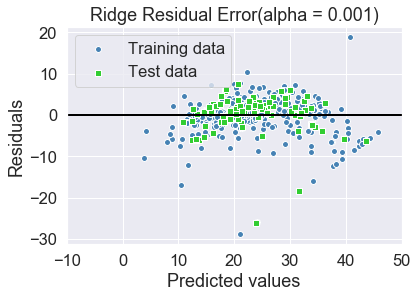

Slope:[-2.06907692e-01  3.01141811e-02  5.09276317e-02  1.79071897e+00
 -1.15583965e+01  5.31688326e+00 -2.06345230e-02 -1.33497034e+00
  2.45684878e-01 -9.20695409e-03 -8.77066904e-01  1.36733156e-02
 -4.79214267e-01]
y Intercept:20.317248224623068
Ridge coefficients:[-2.06907692e-01  3.01141811e-02  5.09276317e-02  1.79071897e+00
 -1.15583965e+01  5.31688326e+00 -2.06345230e-02 -1.33497034e+00
  2.45684878e-01 -9.20695409e-03 -8.77066904e-01  1.36733156e-02
 -4.79214267e-01]
MSE train: 20.043, test: 20.981
R^2 train: 0.747, test: 0.698


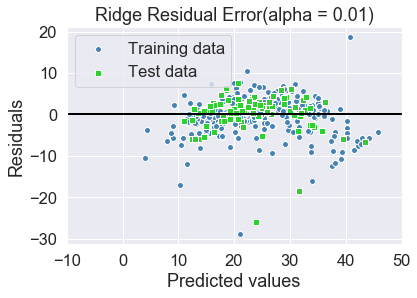

Slope:[-1.76006486e-01  2.83458892e-02  4.08405695e-02  1.82482538e+00
 -1.09789932e+01  5.30485660e+00 -2.02272518e-02 -1.29342485e+00
  2.21213528e-01 -8.39079318e-03 -8.66122737e-01  1.36793033e-02
 -4.78024474e-01]
y Intercept:19.63210400921046
Ridge coefficients:[-1.76006486e-01  2.83458892e-02  4.08405695e-02  1.82482538e+00
 -1.09789932e+01  5.30485660e+00 -2.02272518e-02 -1.29342485e+00
  2.21213528e-01 -8.39079318e-03 -8.66122737e-01  1.36793033e-02
 -4.78024474e-01]
MSE train: 20.053, test: 21.036
R^2 train: 0.747, test: 0.697


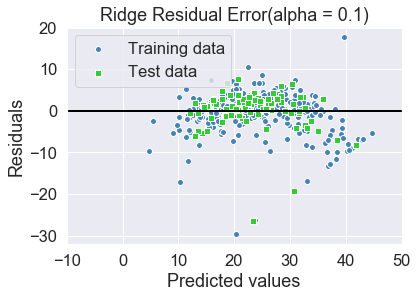

Slope:[-7.65977380e-02  1.98800731e-02 -9.59911869e-03  1.98424272e+00
 -7.27930249e+00  5.10177084e+00 -1.63707029e-02 -9.99909898e-01
  1.17199412e-01 -4.94909519e-03 -7.94070317e-01  1.31365837e-02
 -4.57338526e-01]
y Intercept:16.113779759483933
Ridge coefficients:[-7.65977380e-02  1.98800731e-02 -9.59911869e-03  1.98424272e+00
 -7.27930249e+00  5.10177084e+00 -1.63707029e-02 -9.99909898e-01
  1.17199412e-01 -4.94909519e-03 -7.94070317e-01  1.31365837e-02
 -4.57338526e-01]
MSE train: 20.508, test: 21.584
R^2 train: 0.741, test: 0.689


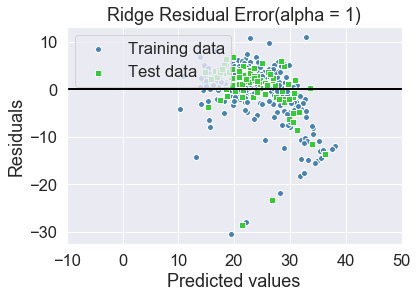

Slope:[-7.77435119e-02  1.40771977e-02 -6.32021368e-02  1.75450313e+00
 -2.60590174e+00  3.32965352e+00 -8.79316612e-03 -3.17556769e-01
  1.40195944e-02 -2.59297392e-03 -5.30829789e-01  8.46778807e-03
 -2.97915218e-01]
y Intercept:17.276422805647563
Ridge coefficients:[-7.77435119e-02  1.40771977e-02 -6.32021368e-02  1.75450313e+00
 -2.60590174e+00  3.32965352e+00 -8.79316612e-03 -3.17556769e-01
  1.40195944e-02 -2.59297392e-03 -5.30829789e-01  8.46778807e-03
 -2.97915218e-01]
MSE train: 28.663, test: 28.776
R^2 train: 0.639, test: 0.585


In [110]:
alpha_space_ridge = [0.01, 0.02, 0.03, 0.04, 0.1]
X = df.iloc[:, :-1].values
y = df['MEDV'].values
for al_ridge in alpha_space_ridge:
    ridge = Ridge(alpha=al_ridge, normalize=True)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    plt.scatter(y_train_pred,  y_train_pred - y_train,
                c='steelblue', marker='o', edgecolor='white',
                label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='limegreen', marker='s', edgecolor='white',
                label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
    plt.xlim([-10, 50])
    plt.title('Ridge Residual Error(alpha = ' + str(al_ridge) + ')')
    plt.show()
    
    print('Slope:' + str(ridge.coef_))
    print('y Intercept:' + str(ridge.intercept_))
    print('Ridge coefficients:' + str(ridge.coef_))
    
    #MSE(Ridge regression)
    print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))
    
    #R2(Ridge regression)
    print('R^2 train: %.3f, test: %.3f' % (
            r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))


In [111]:
alpha_space=np.logspace(-5,-0.25,50)
alpha_value=[]
R2_value=[]
for alpha in alpha_space:
    lasso=Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train,y_train)
    R2=lasso.score(X_test,y_test)
    alpha_value.append(alpha)
    R2_value.append(R2)
best=alpha_space[R2_value.index(max(R2_value))]

In [ ]:
print("My name is Mengyuan Chen")
print("My NetID is: mchen100")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")